# Reconstruction using GraphEM

**Expected time to run through: 10 mins**

This tutorial demonstrates how to get a reconstruction using GraphEM, leveraging HadCRUT4 and PAGES2k.

In [1]:
%load_ext autoreload
%autoreload 2

import LMRt
import GraphEM
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as  plt

In [2]:
job = GraphEM.ReconJob()

In [14]:
job.load_configs('./testcases/PAGES2k_HadCRUT/configs.yml', verbose=True)

GraphEM: job.load_configs() >>> loading reconstruction configurations from: ./testcases/PAGES2k_HadCRUT/configs.yml
GraphEM: job.load_configs() >>> job.configs created
GraphEM: job.load_configs() >>> job.configs["job_dirpath"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon
GraphEM: job.load_configs() >>> /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon created
{'anom_period': [1951, 1980],
 'job_dirpath': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/recon',
 'job_id': 'LMRt_quickstart',
 'obs_path': {'tas': './data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'},
 'obs_varname': {'tas': 'tas_mean'},
 'proxydb_path': './data/proxy/pages2k_dataset.pkl',
 'ptype_list': ['coral.d18O',
                'coral.SrCa',
                'coral.calc',
                'tree.TRW',
                'tree.MXD'],
 'recon_period': [0, 2000]}


In [15]:
job.load_proxydb(verbose=True)

GraphEM: job.load_proxydb() >>> job.configs["proxydb_path"] = /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/proxy/pages2k_dataset.pkl
GraphEM: job.load_proxydb() >>> 692 records loaded
GraphEM: job.load_proxydb() >>> job.proxydb created


In [16]:
job.filter_proxydb(verbose=True)

GraphEM: job.filter_proxydb() >>> filtering proxy records according to: ['coral.d18O', 'coral.SrCa', 'coral.calc', 'tree.TRW', 'tree.MXD']
GraphEM: job.filter_proxydb() >>> 510 records remaining


In [17]:
# ptype_season = {}
# for k, v in job.proxydb.type_dict.items():
#     ptype_season[k] = list(range(1, 13)) # annual
    
# job.seasonalize_proxydb(ptype_season, verbose=True)
job.seasonalize_proxydb(verbose=True)

GraphEM: job.seasonalize_proxydb() >>> job.configs["ptype_season"] = {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.TRW': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.MXD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
GraphEM: job.seasonalize_proxydb() >>> seasonalizing proxy records according to: {'coral.d18O': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.SrCa': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'coral.calc': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.TRW': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'tree.MXD': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}
GraphEM: job.seasonalize_proxydb() >>> 510 records remaining
GraphEM: job.seasonalize_proxydb() >>> job.proxydb updated


In [18]:
job.load_obs(varname_dict={'lat': 'latitude', 'lon': 'longitude', 'tas': 'tas_mean'}, verbose=True)

GraphEM: job.load_obs() >>> loading instrumental observation fields from: {'tas': '/Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'}
GraphEM: job.load_obs() >>> job.obs created


In [19]:
job.seasonalize_obs(verbose=True)

GraphEM: job.seasonalize_obs() >>> job.configs["obs_season"] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
GraphEM: job.seasonalize_obs() >>> seasonalized obs w/ season [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Dataset Overview
-----------------------

     Name:  tas
   Source:  /Users/fzhu/Github/GraphEM/docsrc/tutorial/testcases/PAGES2k_HadCRUT/data/obs/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc
    Shape:  time:171, lat:36, lon:72
GraphEM: job.seasonalize_obs() >>> job.obs updated


/Users/fzhu/Github/LMRt/LMRt/utils.py:258: RuntimeWarning: Mean of empty slice
  tmp = np.nanmean(var[inds, ...], axis=0)


In [20]:
tas = job.obs.fields['tas']
print(tas.time)

[1850 1851 1852 1853 1854 1855 1856 1857 1858 1859 1860 1861 1862 1863
 1864 1865 1866 1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877
 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891
 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905
 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919
 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933
 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [21]:
recon_time = np.arange(1500, 2001)
nt = np.size(recon_time)
idx = np.arange(nt)
calib_size = 70
calib = idx[-calib_size:]
nt_tas, nlat, nlon = np.shape(tas.value)

In [22]:
tas_value = tas.value.reshape(np.shape(tas.value)[0], -1)
nt_tas, npos_tas =  np.shape(tas_value)
print(nt_tas, npos_tas)

temp = np.ndarray((nt, npos_tas))
temp[:,:] = np.nan
temp[-calib_size:] = tas_value[(tas.time>recon_time[-1]-calib_size)&(tas.time<=recon_time[-1])]
print(np.shape(temp))
print(tas.time[(tas.time>recon_time[-1]-calib_size)&(tas.time<=recon_time[-1])])

171 2592
(501, 2592)
[1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000]


In [23]:
npos_proxy = job.proxydb.nrec
lonlat = np.ndarray((npos_tas+npos_proxy, 2))

k = 0
for i in range(tas.nlon):
    for j in range(tas.nlat):
        lonlat[k] = [tas.lon[i], tas.lat[j]]
        k += 1

df_proxy = pd.DataFrame(index=recon_time)
for pid, pobj in job.proxydb.records.items():
    series = pd.Series(index=pobj.time, data=pobj.value, name=pid)
    df_proxy = pd.concat([df_proxy, series], axis=1)
    lonlat[k] = [pobj.lon, pobj.lat]
    k += 1
    
df_proxy = df_proxy[(df_proxy.index>=recon_time[0]) & (df_proxy.index<=recon_time[-1])]
df_proxy

,NAm_153,NAm_165,Asi_178,Asi_174,Asi_198,NAm_145,Arc_071,NAm_102,NAm_046,Ocn_065,...,NAm_143,Asi_208,Asi_119,Ocn_153,Asi_026,Ocn_169,Asi_201,Asi_179,Ocn_071,Ocn_072
1500.0,NaN,NaN,0.994,NaN,NaN,NaN,1.06,NaN,1.026,NaN,...,NaN,0.805,0.849,NaN,0.710,NaN,NaN,NaN,NaN,NaN
1501.0,NaN,NaN,1.131,NaN,NaN,NaN,0.70,NaN,1.058,NaN,...,NaN,0.694,0.882,NaN,0.759,NaN,NaN,NaN,NaN,NaN
1502.0,NaN,NaN,0.898,NaN,NaN,NaN,1.31,NaN,1.088,NaN,...,NaN,0.742,0.620,NaN,0.944,NaN,NaN,NaN,NaN,NaN
1503.0,NaN,NaN,1.032,NaN,NaN,NaN,0.70,NaN,0.875,NaN,...,NaN,0.677,0.413,NaN,0.845,NaN,NaN,NaN,NaN,NaN
1504.0,NaN,NaN,0.832,NaN,NaN,NaN,-0.43,NaN,1.139,NaN,...,NaN,0.730,0.551,NaN,0.702,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996.0,1.346,NaN,1.028,NaN,1.647,1.146,1.36,1.033,1.373,NaN,...,NaN,1.490,0.813,9.099227,0.922,NaN,1.070,1.044,-4.114561,8.819362
1997.0,NaN,NaN,NaN,NaN,1.751,1.263,2.30,1.037,1.153,NaN,...,NaN,1.278,0.864,9.192620,1.112,NaN,1.007,1.166,-4.231963,8.767808
1998.0,NaN,NaN,NaN,NaN,1.499,1.054,0.67,1.171,1.369,NaN,...,NaN,1.332,0.743,9.124461,1.260,NaN,1.111,1.161,-4.427678,8.751082
1999.0,NaN,NaN,NaN,NaN,1.054,1.067,1.47,NaN,1.502,NaN,...,NaN,1.161,1.269,9.073438,0.980,NaN,1.402,0.851,-4.081667,8.825333


In [24]:
proxy = df_proxy.values
print(np.shape(proxy))
print(np.shape(lonlat))
print(npos_tas+npos_proxy)

(501, 510)
(3102, 2)
3102


In [25]:
%%time

G = GraphEM.solver.GraphEM()
G.fit(temp, proxy, calib, lonlat=lonlat, graph_method='neighborhood')

pd.to_pickle(G, './testcases/PAGES2k_HadCRUT/recon/G.pkl')

Estimating graph using neighborhood method
Running GraphEM:

Iter     dXmis     rdXmis

001     0.3008     0.0830
002     0.2886     0.0816
003     0.0713     0.0201
004     0.0635     0.0181
005     0.0659     0.0189
006     0.0649     0.0187
007     0.0560     0.0163
008     0.0438     0.0128
009     0.0341     0.0100
010     0.0293     0.0086
011     0.0286     0.0084
012     0.0292     0.0086
013     0.0304     0.0089
014     0.0316     0.0093
015     0.0333     0.0098
016     0.0350     0.0103
017     0.0372     0.0109
018     0.0392     0.0115
019     0.0405     0.0119
020     0.0414     0.0122
021     0.0420     0.0124
022     0.0410     0.0121
023     0.0400     0.0118
024     0.0381     0.0112
025     0.0366     0.0108
026     0.0358     0.0105
027     0.0359     0.0105
028     0.0357     0.0105
029     0.0350     0.0103
030     0.0351     0.0103
031     0.0347     0.0102
032     0.0339     0.0099
033     0.0322     0.0094
034     0.0323     0.0094
035     0.0316     0.0092
03

In [26]:
np.shape(G.temp_r)

(501, 2592)

In [27]:
recon = G.temp_r.reshape((nt, nlat, nlon))
print(np.shape(recon))

(501, 36, 72)


In [28]:
nino = LMRt.utils.nino_indices(recon, tas.lat, tas.lon)
ts_recon = LMRt.Series(time=np.arange(1500, 2001), value=nino['nino3.4'])

In [29]:
from scipy.io import loadmat

data = loadmat('./testcases/PAGES2k_HadCRUT/data/obs/NINO34_BC09.mat')
syr, eyr = 1873, 2000
nyr = eyr-syr+1
nino34 = np.zeros(nyr)
for i in range(nyr):
    nino34[i] = np.mean(data['nino34'][i*12:12+i*12])

ts_target = LMRt.Series(time=np.arange(syr, eyr+1), value=nino34, label='BC09')

In [30]:
ts_hadcrut = LMRt.Series(
    time=tas.time,
    value=LMRt.utils.nino_indices(tas.value, tas.lat, tas.lon)['nino3.4'],
    label='HadCRUT',
)

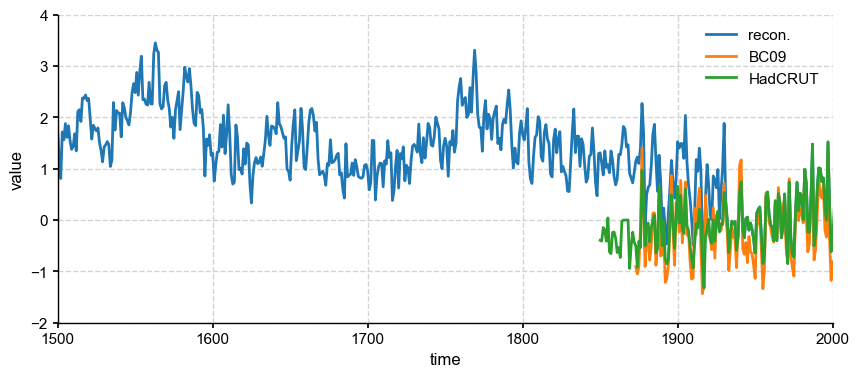

In [35]:
# plot and validate the NINO3.4
fig, ax = ts_recon.plot(mute=True, label='recon.')
ax.set_xlim(1500, 2000)
ax.set_ylim(-2, 4)
ts_target.plot(ax=ax)
ts_hadcrut.plot(ax=ax)
LMRt.showfig(fig)